## Preparation

In [1]:
import numpy as np
import pandas as pd
Train_df = pd.read_csv('./data/train_newfeature.csv')
Valid_df = pd.read_csv('./data/valid_newfeature.csv')

In [2]:
Samp_per=0.1

In [3]:
# #Samp_per should be in 0.001,0.01,0.025,0.05,0.075,0.1
# Samp_per=0.025
# # bids which click =1
# df1 = Train_df[Train_df['click']==1]
# # bids which click =0
# df0 = Train_df[Train_df['click']==0]
# # get 10% of click =0 data, down sampling
# df2=df0.sample(frac=Samp_per)
# # combine 10% of click =0 data and all click=1, down sampling
# combined_df = pd.concat([df1, df2],axis=0)
# combined_df.head()
# combined_df.shape
# #new trainning set shape is(62523, 127)

In [4]:
# combined_df.to_csv('/Users/weisihan/Desktop/ourtrainingset_Simple_XGBoost_model_25.csv', encoding='utf-8', index=False)

In [5]:
cols=list(Valid_df.columns)[1:]

In [6]:
# train_y = combined_df['click']
# train_x = combined_df[cols]

In [7]:
# import xgboost

# xgb = xgboost.XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=100,
#  max_depth=6,
#  min_child_weight=7,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  reg_alpha=0.01,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# #modelfit(xgb4, train, predictors)

In [8]:
# #train xgboost model
# import xgboost
# X = train_x
# y = train_y
# # train the default model
# #model = xgboost.XGBClassifier()
# model = xgb
# model.fit(X, y)
# #14:15-14:16

In [9]:
# from sklearn.externals import joblib

# filename = 'Simple_XGBoost_model_25.sav'
# joblib.dump(model, filename)

In [10]:
from sklearn.externals import joblib
model = joblib.load('XGBoost_Sample10_click179.sav')

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## validation set

In [13]:
#test the default model
valid_x = Valid_df[cols]
valid_predictions = model.predict_proba(valid_x)
valid_predictions_class = model.predict(valid_x)

In [14]:
valid_predictions[:,1]

array([ 0.0015358 ,  0.00162139,  0.00130635, ...,  0.01366363,
        0.00408642,  0.00222968], dtype=float32)

In [15]:
valid_result = pd.DataFrame(columns=['click', 'click_pred_per', 'click_pred_class'])  
valid_result['click']= Valid_df['click'].copy()
valid_result['click_pred_per'] = valid_predictions[:,1]
valid_result['click_pred_class'] = valid_predictions_class
valid_result.head()

click  click_pred_per  click_pred_class
0      0        0.001536                 0
1      0        0.001621                 0
2      0        0.001306                 0
3      0        0.001191                 0
4      0        0.001080                 0

In [16]:
def recalibrate(p,w):
    q = p/(p+(1-p)/w)
    return q

In [17]:
valid_result['click_pred_per']=recalibrate(valid_result['click_pred_per'],Samp_per)
valid_result.head()

click  click_pred_per  click_pred_class
0      0        0.000154                 0
1      0        0.000162                 0
2      0        0.000131                 0
3      0        0.000119                 0
4      0        0.000108                 0

## trainset

In [18]:
#train set

In [11]:
#test the default model
train_x = Train_df[cols]
train_predictions = model.predict_proba(train_x)
train_predictions_class = model.predict(train_x)

In [12]:
train_predictions[:,1]

array([ 0.00134296,  0.00551858,  0.00094652, ...,  0.00713877,
        0.00335231,  0.00212967], dtype=float32)

In [13]:
train_result = pd.DataFrame(columns=['click', 'click_pred_per', 'click_pred_class'])  
train_result['click']= Train_df['click'].copy()
train_result['click_pred_per'] = train_predictions[:,1]
train_result['click_pred_class'] = train_predictions_class
train_result.head()

click  click_pred_per  click_pred_class
0      0        0.001343                 0
1      0        0.005519                 0
2      0        0.000947                 0
3      0        0.003428                 0
4      0        0.002591                 0

In [14]:
def recalibrate(p,w):
    q = p/(p+(1-p)/w)
    return q

In [15]:
train_result['click_pred_per']=recalibrate(train_result['click_pred_per'],Samp_per)
train_result.head()

click  click_pred_per  click_pred_class
0      0        0.000134                 0
1      0        0.000555                 0
2      0        0.000095                 0
3      0        0.000344                 0
4      0        0.000260                 0

In [16]:
train_result.shape

(2430981, 3)

In [26]:
lgbm_train = pd.read_csv('./lgbm_train_pctr.csv')
fm_train = pd.read_csv('./fm_train_pctr.csv')

In [27]:
lgbm_train.head()

click  click_pred_per  click_pred_class
0      0        0.000100                 0
1      0        0.000555                 0
2      0        0.000071                 0
3      0        0.000299                 0
4      0        0.000355                 0

In [28]:
fm_train.head()

click  click_pred_per
0      0        0.000047
1      0        0.000064
2      0        0.000006
3      0        0.000068
4      0        0.000180

In [29]:
train_result['lgbm_pctr']=lgbm_train['click_pred_per']

In [31]:
train_result['fm_pctr']=fm_train['click_pred_per']

In [33]:
train_result['xg_pctr']=train_result['click_pred_per'].copy()

In [34]:
train_result.head()

click  click_pred_per  click_pred_class  lgbm_pctr   fm_pctr   xg_pctr
0      0        0.000134                 0   0.000100  0.000047  0.000134
1      0        0.000555                 0   0.000555  0.000064  0.000555
2      0        0.000095                 0   0.000071  0.000006  0.000095
3      0        0.000344                 0   0.000299  0.000068  0.000344
4      0        0.000260                 0   0.000355  0.000180  0.000260

## observe

observe validation

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
valid_result['logpctr'] = np.log(valid_result['click_pred_per'])

click  click_pred_per  click_pred_class   logpctr
0      0        0.000154                 0 -8.779909
1      0        0.000162                 0 -8.725598
2      0        0.000131                 0 -8.941928
3      0        0.000119                 0 -9.034147
4      0        0.000108                 0 -9.132151

In [98]:
valid_result.head()

click  click_pred_per  click_pred_class
0      0        0.000154                 0
1      0        0.000162                 0
2      0        0.000131                 0
3      0        0.000119                 0
4      0        0.000108                 0

In [93]:
train_result.head()

click  click_pred_per  click_pred_class  lgbm_pctr   fm_pctr   xg_pctr  \
0      0        0.000134                 0   0.000100  0.000047  0.000134   
1      0        0.000555                 0   0.000555  0.000064  0.000555   
2      0        0.000095                 0   0.000071  0.000006  0.000095   
3      0        0.000344                 0   0.000299  0.000068  0.000344   
4      0        0.000260                 0   0.000355  0.000180  0.000260   

   lgbm_logpctr  fm_logpctr  xg_logpctr  xg+fm_pctr  xg+fm_logpctr  \
0     -9.214300   -9.963452   -8.914258    0.000182      -8.613990   
1     -7.496752   -9.660185   -7.497241    0.000618      -7.388399   
2     -9.554251  -11.961051   -9.264453    0.000101      -9.199195   
3     -8.116344   -9.603379   -7.975179    0.000411      -7.795960   
4     -7.943298   -8.620934   -8.255926    0.000440      -7.728721   

     xg*fm_pctr  xg*fm_logpctr  
0  6.331623e-09     -18.877709  
1  3.536916e-08     -17.157426  
2  6.051750e-10     -21.225503  
3  2.321289e-08     -17.578558  
4  4.682444e-08     -16.876861

In [96]:
combine_feature = train_result.drop(['click_pred_per','click_pred_class'],axis=1)

In [97]:
# combine_feature.to_csv('combine_pctr_feature.csv', encoding='utf-8', index=False)

In [36]:
train_result['lgbm_logpctr'] = np.log(train_result['lgbm_pctr'])

In [37]:
train_result['fm_logpctr'] = np.log(train_result['fm_pctr'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [38]:
train_result['xg_logpctr'] = np.log(train_result['xg_pctr'])

In [66]:
train_result['xg+fm_pctr'] = train_result['xg_pctr']+train_result['fm_pctr']

In [68]:
train_result['xg+fm_logpctr'] = np.log(train_result['xg+fm_pctr'])

In [80]:
train_result['xg*fm_pctr'] = train_result['xg_pctr']*train_result['fm_pctr']

In [81]:
train_result['xg*fm_logpctr'] = np.log(train_result['xg*fm_pctr'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [93]:
train_result.head()

click  click_pred_per  click_pred_class  lgbm_pctr   fm_pctr   xg_pctr  \
0      0        0.000134                 0   0.000100  0.000047  0.000134   
1      0        0.000555                 0   0.000555  0.000064  0.000555   
2      0        0.000095                 0   0.000071  0.000006  0.000095   
3      0        0.000344                 0   0.000299  0.000068  0.000344   
4      0        0.000260                 0   0.000355  0.000180  0.000260   

   lgbm_logpctr  fm_logpctr  xg_logpctr  xg+fm_pctr  xg+fm_logpctr  \
0     -9.214300   -9.963452   -8.914258    0.000182      -8.613990   
1     -7.496752   -9.660185   -7.497241    0.000618      -7.388399   
2     -9.554251  -11.961051   -9.264453    0.000101      -9.199195   
3     -8.116344   -9.603379   -7.975179    0.000411      -7.795960   
4     -7.943298   -8.620934   -8.255926    0.000440      -7.728721   

     xg*fm_pctr  xg*fm_logpctr  
0  6.331623e-09     -18.877709  
1  3.536916e-08     -17.157426  
2  6.051750e-10     -21.225503  
3  2.321289e-08     -17.578558  
4  4.682444e-08     -16.876861

In [96]:
combine_feature = train_result.drop(['click_pred_per','click_pred_class'],axis=1)

In [97]:
# combine_feature.to_csv('combine_pctr_feature.csv', encoding='utf-8', index=False)

In [36]:
train_result['lgbm_logpctr'] = np.log(train_result['lgbm_pctr'])

In [37]:
train_result['fm_logpctr'] = np.log(train_result['fm_pctr'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [38]:
train_result['xg_logpctr'] = np.log(train_result['xg_pctr'])

In [66]:
train_result['xg+fm_pctr'] = train_result['xg_pctr']+train_result['fm_pctr']

In [68]:
train_result['xg+fm_logpctr'] = np.log(train_result['xg+fm_pctr'])

In [80]:
train_result['xg*fm_pctr'] = train_result['xg_pctr']*train_result['fm_pctr']

In [81]:
train_result['xg*fm_logpctr'] = np.log(train_result['xg*fm_pctr'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [24]:
vr1 = valid_result[valid_result['click'] == 1]
vr0 = valid_result[valid_result['click'] == 0]

In [25]:
vr1.describe()

click  click_pred_per  click_pred_class     logpctr
count  202.0      202.000000        202.000000  202.000000
mean     1.0        0.113735          0.316832   -4.854391
std      0.0        0.188429          0.466397    2.781414
min      1.0        0.000156          0.000000   -8.767542
25%      1.0        0.000669          0.000000   -7.309294
50%      1.0        0.002635          0.000000   -5.938784
75%      1.0        0.142847          1.000000   -1.946121
max      1.0        0.738427          1.000000   -0.303233

In [26]:
vr0.describe()

click  click_pred_per  click_pred_class        logpctr
count  303723.0   303723.000000     303723.000000  303723.000000
mean        0.0        0.000605          0.000398      -8.086448
std         0.0        0.005128          0.019956       0.847690
min         0.0        0.000040          0.000000     -10.119146
25%         0.0        0.000169          0.000000      -8.688266
50%         0.0        0.000281          0.000000      -8.177979
75%         0.0        0.000469          0.000000      -7.664403
max         0.0        0.663336          1.000000      -0.410474

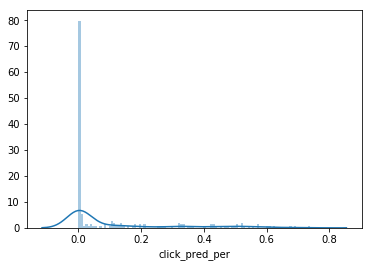

In [27]:
sns.distplot(vr1['click_pred_per'],bins = 100)
plt.show()

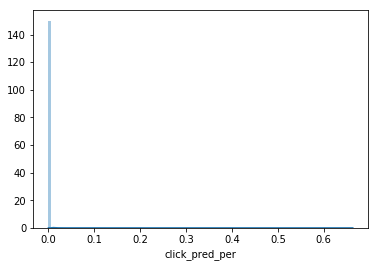

In [28]:
sns.distplot(vr0['click_pred_per'],bins = 100)
plt.show()

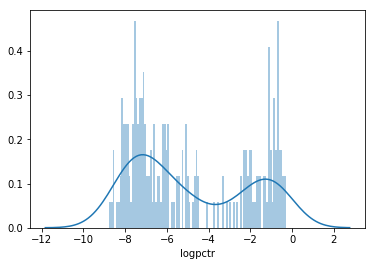

In [29]:
sns.distplot(vr1['logpctr'],bins = 100)
plt.show()

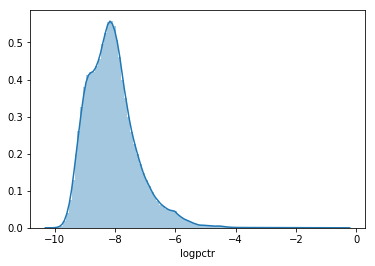

In [30]:
sns.distplot(vr0['logpctr'],bins = 100)
plt.show()

In [31]:
df_valid = pd.read_csv("./we_data/validation.csv")

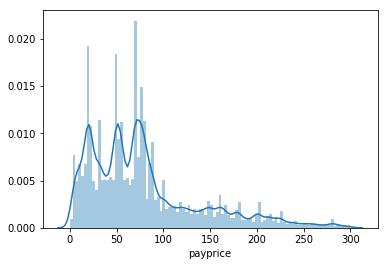

In [32]:
sns.distplot(df_valid['payprice'],bins = 100)
plt.show()

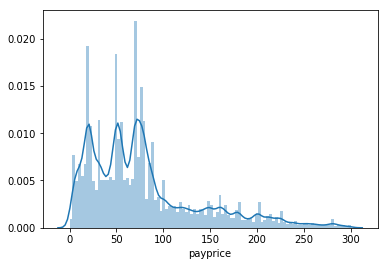

In [33]:
sns.distplot(df_valid['payprice'][df_valid['click'] == 0],bins = 100)
plt.show()

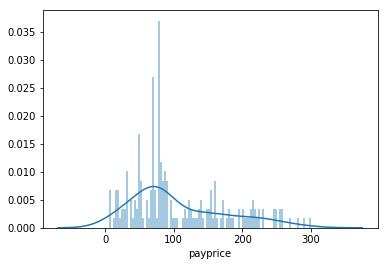

In [34]:
sns.distplot(df_valid['payprice'][df_valid['click'] == 1],bins = 100)
plt.show()

In [35]:
valid_x.shape

(303925, 126)

In [36]:
vvr = valid_result.copy()

In [37]:
vvr.shape

(303925, 4)

In [38]:
vvr.head()

click  click_pred_per  click_pred_class   logpctr
0      0        0.000154                 0 -8.779909
1      0        0.000162                 0 -8.725598
2      0        0.000131                 0 -8.941928
3      0        0.000119                 0 -9.034147
4      0        0.000108                 0 -9.132151

In [39]:
# vvr = pd.concat([valid_x,valid_result],axis = 1)  

In [40]:
df_valid['newpprice'] = df_valid["payprice"] 

In [41]:
df_valid['newpprice'][df_valid['newpprice'] == 0] = 1

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_valid[df_valid['newpprice'] == 0]

Empty DataFrame
Columns: [click, weekday, hour, bidid, userid, useragent, IP, region, city, adexchange, domain, url, urlid, slotid, slotwidth, slotheight, slotvisibility, slotformat, slotprice, creative, bidprice, payprice, keypage, advertiser, usertag, newpprice]
Index: []

[0 rows x 26 columns]

In [43]:
vvr['ctr-price'] = vvr['click_pred_per']/df_valid['newpprice']

In [44]:
vvr['logctr-price'] = np.log(vvr['click_pred_per']/df_valid['newpprice'])

In [45]:
vvr.head()

click  click_pred_per  click_pred_class   logpctr  ctr-price  logctr-price
0      0        0.000154                 0 -8.779909   0.000007    -11.915403
1      0        0.000162                 0 -8.725598   0.000002    -13.043086
2      0        0.000131                 0 -8.941928   0.000002    -13.116316
3      0        0.000119                 0 -9.034147   0.000020    -10.825907
4      0        0.000108                 0 -9.132151   0.000022    -10.741588

In [46]:
vvr1 = vvr[vvr['click'] == 1]
vvr0 = vvr[vvr['click'] == 0]

In [47]:
vvr.describe()

click  click_pred_per  click_pred_class        logpctr  \
count  303925.000000   303925.000000     303925.000000  303925.000000   
mean        0.000665        0.000680          0.000609      -8.084300   
std         0.025772        0.007633          0.024664       0.854491   
min         0.000000        0.000040          0.000000     -10.119146   
25%         0.000000        0.000169          0.000000      -8.687877   
50%         0.000000        0.000281          0.000000      -8.177563   
75%         0.000000        0.000470          0.000000      -7.663282   
max         1.000000        0.738427          1.000000      -0.303233   

          ctr-price   logctr-price  
count  3.039250e+05  303925.000000  
mean   1.780206e-05     -12.110500  
std    1.797989e-04       1.177841  
min    1.671858e-07     -15.604160  
25%    2.352196e-06     -12.960161  
50%    4.835172e-06     -12.239594  
75%    1.111481e-05     -11.407232  
max    2.932334e-02      -3.529371

In [48]:
vvr1.describe()

click  click_pred_per  click_pred_class     logpctr   ctr-price  \
count  202.0      202.000000        202.000000  202.000000  202.000000   
mean     1.0        0.113735          0.316832   -4.854391    0.001867   
std      0.0        0.188429          0.466397    2.781414    0.004126   
min      1.0        0.000156          0.000000   -8.767542    0.000001   
25%      1.0        0.000669          0.000000   -7.309294    0.000009   
50%      1.0        0.002635          0.000000   -5.938784    0.000034   
75%      1.0        0.142847          1.000000   -1.946121    0.001422   
max      1.0        0.738427          1.000000   -0.303233    0.029323   

       logctr-price  
count    202.000000  
mean      -9.269579  
std        2.898239  
min      -13.591767  
25%      -11.673219  
50%      -10.290496  
75%       -6.555829  
max       -3.529371

In [49]:
vvr0.describe()

click  click_pred_per  click_pred_class        logpctr  \
count  303723.0   303723.000000     303723.000000  303723.000000   
mean        0.0        0.000605          0.000398      -8.086448   
std         0.0        0.005128          0.019956       0.847690   
min         0.0        0.000040          0.000000     -10.119146   
25%         0.0        0.000169          0.000000      -8.688266   
50%         0.0        0.000281          0.000000      -8.177979   
75%         0.0        0.000469          0.000000      -7.664403   
max         0.0        0.663336          1.000000      -0.410474   

          ctr-price   logctr-price  
count  3.037230e+05  303723.000000  
mean   1.657187e-05     -12.112389  
std    1.371361e-04       1.173585  
min    1.671858e-07     -15.604160  
25%    2.351211e-06     -12.960580  
50%    4.832565e-06     -12.240133  
75%    1.110100e-05     -11.408475  
max    2.071418e-02      -3.876937

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

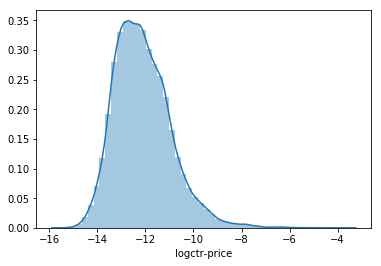

In [51]:
sns.distplot(vvr['logctr-price'])
plt.show()

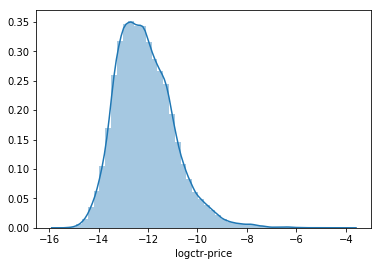

In [52]:
sns.distplot(vvr0['logctr-price'])
plt.show()

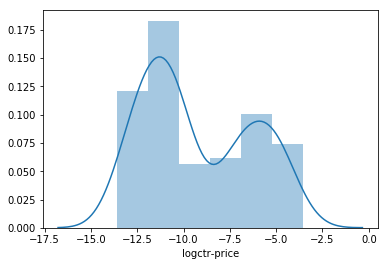

In [53]:
sns.distplot(vvr1['logctr-price'])
plt.show()

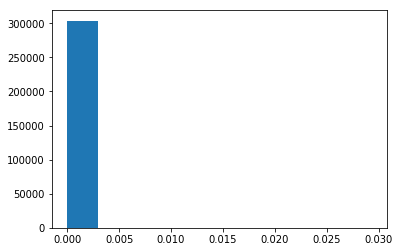

In [54]:
plt.hist(vvr['ctr-price'])
plt.show()

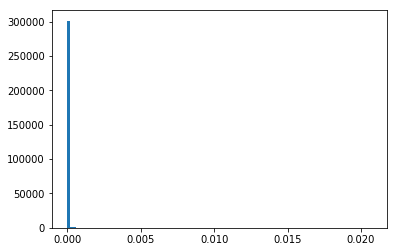

In [55]:
plt.hist(vvr0['ctr-price'],bins=100)
plt.show()

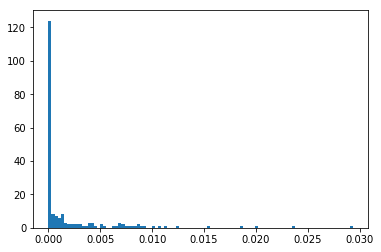

In [56]:
plt.hist(vvr1['ctr-price'],bins=100)
plt.show()

observe training

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
train_result['logpctr'] = np.log(train_result['click_pred_per'])

In [19]:
train_result.head()

click  click_pred_per  click_pred_class   logpctr
0      0        0.000134                 0 -8.914258
1      0        0.000555                 0 -7.497241
2      0        0.000095                 0 -9.264453
3      0        0.000344                 0 -7.975179
4      0        0.000260                 0 -8.255926

In [96]:
combine_feature = train_result.drop(['click_pred_per','click_pred_class'],axis=1)

In [97]:
# combine_feature.to_csv('combine_pctr_feature.csv', encoding='utf-8', index=False)

In [36]:
train_result['lgbm_logpctr'] = np.log(train_result['lgbm_pctr'])

In [37]:
train_result['fm_logpctr'] = np.log(train_result['fm_pctr'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [38]:
train_result['xg_logpctr'] = np.log(train_result['xg_pctr'])

In [66]:
train_result['xg+fm_pctr'] = train_result['xg_pctr']+train_result['fm_pctr']

In [68]:
train_result['xg+fm_logpctr'] = np.log(train_result['xg+fm_pctr'])

In [80]:
train_result['xg*fm_pctr'] = train_result['xg_pctr']*train_result['fm_pctr']

In [81]:
train_result['xg*fm_logpctr'] = np.log(train_result['xg*fm_pctr'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [20]:
tr1 = train_result[train_result['click'] == 1]
tr0 = train_result[train_result['click'] == 0]

In [21]:
tr1.describe()

click  click_pred_per  click_pred_class      logpctr
count  1793.0     1793.000000       1793.000000  1793.000000
mean      1.0        0.116613          0.324596    -4.654032
std       0.0        0.188297          0.468354     2.685989
min       1.0        0.000095          0.000000    -9.263820
25%       1.0        0.000887          0.000000    -7.027955
50%       1.0        0.003771          0.000000    -5.580340
75%       1.0        0.181730          1.000000    -1.705234
max       1.0        0.786879          1.000000    -0.239681

In [22]:
tr0.describe()

click  click_pred_per  click_pred_class       logpctr
count  2429188.0    2.429188e+06      2.429188e+06  2.429188e+06
mean         0.0    6.180568e-04      4.351248e-04 -8.083221e+00
std          0.0    5.454601e-03      2.085511e-02  8.501921e-01
min          0.0    3.538435e-05      0.000000e+00 -1.024924e+01
25%          0.0    1.693240e-04      0.000000e+00 -8.683697e+00
50%          0.0    2.812817e-04      0.000000e+00 -8.176154e+00
75%          0.0    4.697136e-04      0.000000e+00 -7.663387e+00
max          0.0    7.587438e-01      1.000000e+00 -2.760911e-01

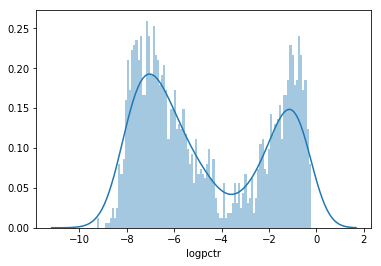

In [23]:
sns.distplot(tr1['logpctr'],bins = 100)
plt.show()

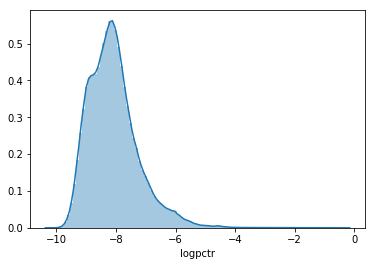

In [24]:
sns.distplot(tr0['logpctr'],bins = 100)
plt.show()

lgbm

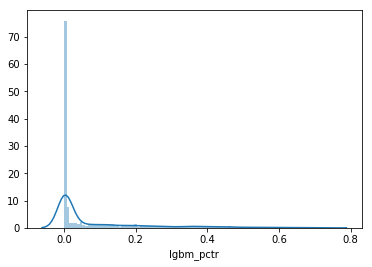

In [46]:
sns.distplot(tr1['lgbm_pctr'],bins = 100)
plt.show()

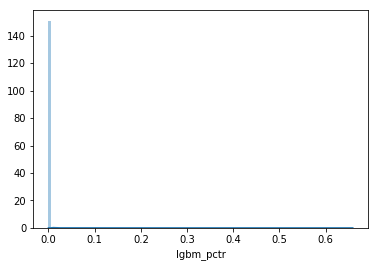

In [47]:
sns.distplot(tr0['lgbm_pctr'],bins = 100)
plt.show()

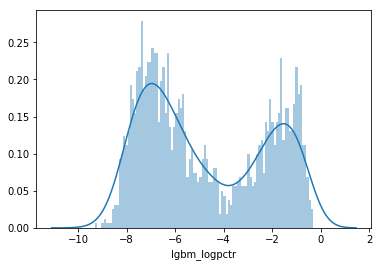

In [48]:
sns.distplot(tr1['lgbm_logpctr'],bins = 100)
plt.show()

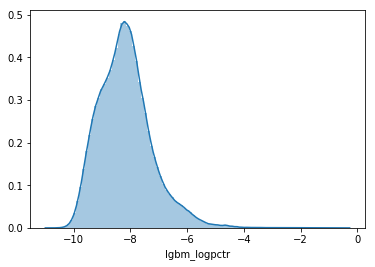

In [49]:
sns.distplot(tr0['lgbm_logpctr'],bins = 100)
plt.show()

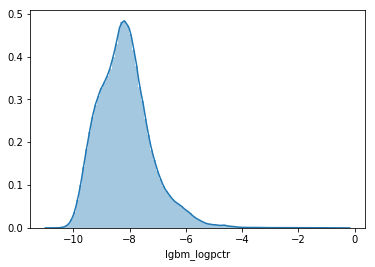

In [50]:
sns.distplot(train_result['lgbm_logpctr'],bins = 100)
plt.show()

fm

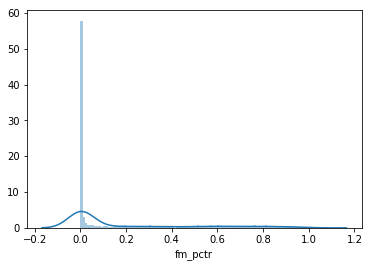

In [52]:
sns.distplot(tr1['fm_pctr'],bins = 100)
plt.show()

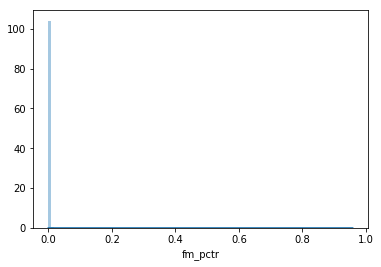

In [53]:
sns.distplot(tr0['fm_pctr'],bins = 100)
plt.show()

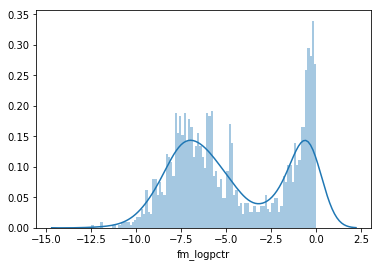

In [54]:
sns.distplot(tr1['fm_logpctr'],bins = 100)
plt.show()

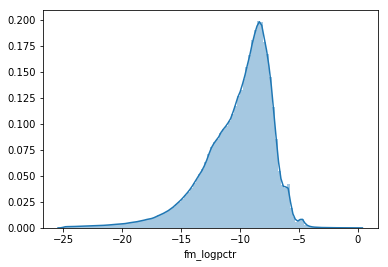

In [92]:
sns.distplot(tr0['fm_logpctr'][tr0['fm_logpctr']>-25],bins = 100)
plt.show()

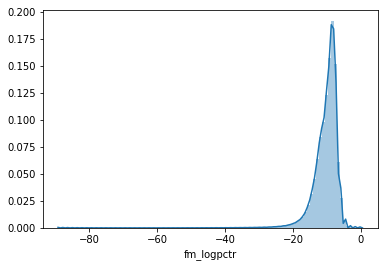

In [60]:
sns.distplot(train_result['fm_logpctr'][train_result['fm_pctr']>0],bins = 100)
plt.show()

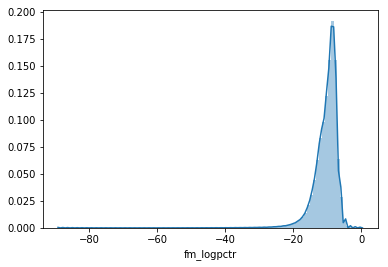

In [61]:
sns.distplot(tr0['fm_logpctr'][tr0['fm_pctr']>0],bins = 100)
plt.show()

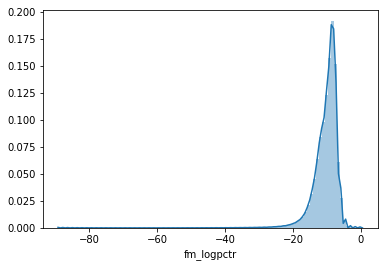

In [60]:
sns.distplot(train_result['fm_logpctr'][train_result['fm_pctr']>0],bins = 100)
plt.show()

In [62]:
train_result[train_result['fm_pctr']>0].shape

(2430294, 9)

In [63]:
train_result.shape

(2430981, 9)

fm+xg

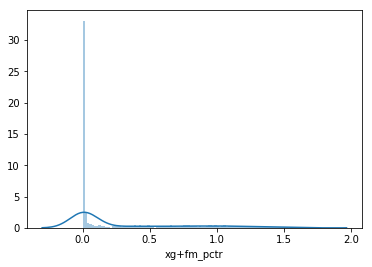

In [75]:
sns.distplot(tr1['xg+fm_pctr'],bins = 100)
plt.show()

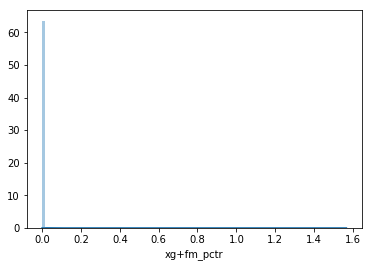

In [76]:
sns.distplot(tr0['xg+fm_pctr'],bins = 100)
plt.show()

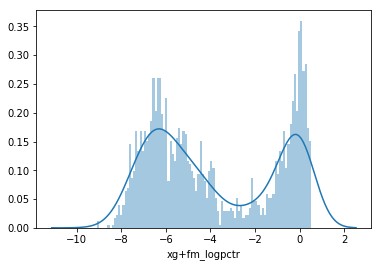

In [77]:
sns.distplot(tr1['xg+fm_logpctr'],bins = 100)
plt.show()

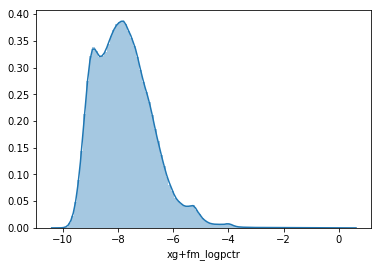

In [78]:
sns.distplot(tr0['xg+fm_logpctr'],bins = 100)
plt.show()

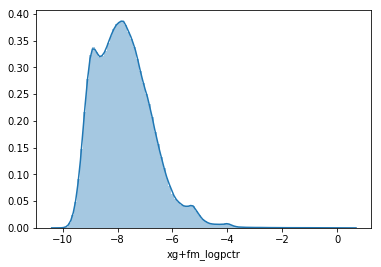

In [79]:
sns.distplot(train_result['xg+fm_logpctr'],bins = 100)
plt.show()

fm*xg

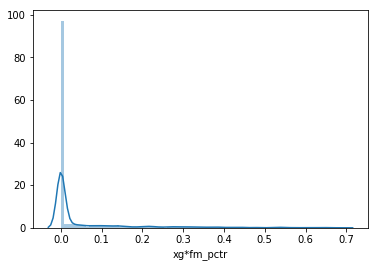

In [86]:
sns.distplot(tr1['xg*fm_pctr'],bins = 100)
plt.show()

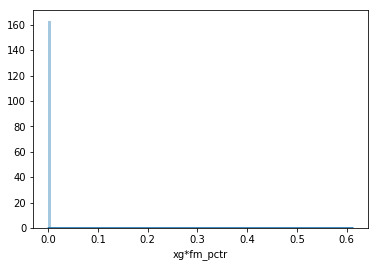

In [87]:
sns.distplot(tr0['xg*fm_pctr'],bins = 100)
plt.show()

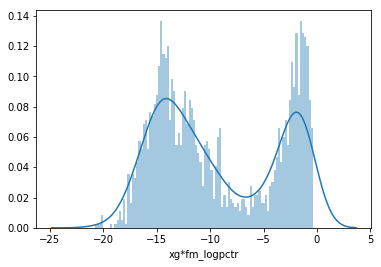

In [88]:
sns.distplot(tr1['xg*fm_logpctr'],bins = 100)
plt.show()

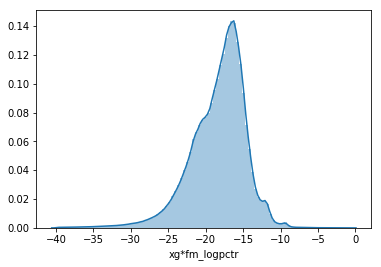

In [91]:
sns.distplot(tr0['xg*fm_logpctr'][tr0['xg*fm_logpctr']>-40],bins = 100)
plt.show()

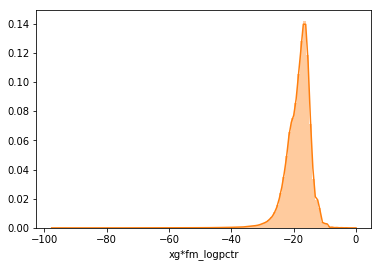

In [90]:
sns.distplot(tr0['xg*fm_logpctr'][tr0['xg*fm_pctr']>0],bins = 100)
plt.show()

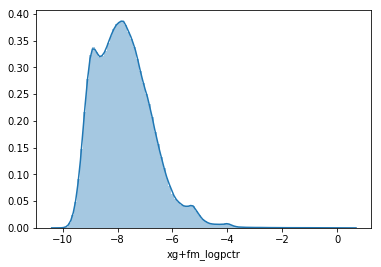

In [79]:
sns.distplot(train_result['xg+fm_logpctr'],bins = 100)
plt.show()

pctr/payprice

In [67]:
df_train = pd.read_csv("./we_data/train.csv")

In [68]:
train_x.shape

(2430981, 126)

In [69]:
ttr = train_result.copy()

In [70]:
ttr.shape

(2430981, 4)

In [71]:
ttr.head()

click  click_pred_per  click_pred_class   logpctr
0      0        0.000134                 0 -8.914258
1      0        0.000555                 0 -7.497241
2      0        0.000095                 0 -9.264453
3      0        0.000344                 0 -7.975179
4      0        0.000260                 0 -8.255926

In [72]:
# vvr = pd.concat([valid_x,valid_result],axis = 1)  

In [73]:
df_train['newpprice'] = df_train["payprice"] 

In [74]:
df_train['newpprice'][df_train['newpprice'] == 0] = 1

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
df_train[df_train['newpprice'] == 0]

Empty DataFrame
Columns: [click, weekday, hour, bidid, userid, useragent, IP, region, city, adexchange, domain, url, urlid, slotid, slotwidth, slotheight, slotvisibility, slotformat, slotprice, creative, bidprice, payprice, keypage, advertiser, usertag, newpprice]
Index: []

[0 rows x 26 columns]

In [76]:
ttr['ctr-price'] = ttr['click_pred_per']/df_train['newpprice']

In [77]:
ttr['logctr-price'] = np.log(ttr['click_pred_per']/df_train['newpprice'])

In [78]:
ttr.head()

click  click_pred_per  click_pred_class   logpctr  ctr-price  logctr-price
0      0        0.000134                 0 -8.914258   0.000027    -10.523695
1      0        0.000555                 0 -7.497241   0.000024    -10.632735
2      0        0.000095                 0 -9.264453   0.000004    -12.442507
3      0        0.000344                 0 -7.975179   0.000014    -11.194055
4      0        0.000260                 0 -8.255926   0.000002    -13.146275

In [79]:
ttr1 = ttr[ttr['click'] == 1]
ttr0 = ttr[ttr['click'] == 0]

In [80]:
ttr.describe()

click  click_pred_per  click_pred_class       logpctr  \
count  2.430981e+06    2.430981e+06      2.430981e+06  2.430981e+06   
mean   7.375623e-04    7.036102e-04      6.742134e-04 -8.080691e+00   
std    2.714809e-02    8.110702e-03      2.595687e-02  8.580667e-01   
min    0.000000e+00    3.538435e-05      0.000000e+00 -1.024924e+01   
25%    0.000000e+00    1.694009e-04      0.000000e+00 -8.683242e+00   
50%    0.000000e+00    2.814506e-04      0.000000e+00 -8.175554e+00   
75%    0.000000e+00    4.703124e-04      0.000000e+00 -7.662113e+00   
max    1.000000e+00    7.868791e-01      1.000000e+00 -2.396807e-01   

          ctr-price  logctr-price  
count  2.430981e+06  2.430981e+06  
mean   1.855041e-05 -1.210754e+01  
std    2.775422e-04  1.181264e+00  
min    1.792525e-07 -1.553447e+01  
25%    2.357799e-06 -1.295778e+01  
50%    4.837366e-06 -1.223914e+01  
75%    1.113474e-05 -1.140544e+01  
max    2.040202e-01 -1.589536e+00

In [81]:
ttr1.describe()

click  click_pred_per  click_pred_class      logpctr     ctr-price  \
count  1793.0     1793.000000       1793.000000  1793.000000  1.793000e+03   
mean      1.0        0.116613          0.324596    -4.654032  1.677291e-03   
std       0.0        0.188297          0.468354     2.685989  4.284039e-03   
min       1.0        0.000095          0.000000    -9.263820  7.540422e-07   
25%       1.0        0.000887          0.000000    -7.027955  1.036706e-05   
50%       1.0        0.003771          0.000000    -5.580340  5.369700e-05   
75%       1.0        0.181730          1.000000    -1.705234  1.912248e-03   
max       1.0        0.786879          1.000000    -0.239681  9.245175e-02   

       logctr-price  
count   1793.000000  
mean      -9.070110  
std        2.767718  
min      -14.097817  
25%      -11.476877  
50%       -9.832153  
75%       -6.259476  
max       -2.381068

In [82]:
ttr0.describe()

click  click_pred_per  click_pred_class       logpctr  \
count  2429188.0    2.429188e+06      2.429188e+06  2.429188e+06   
mean         0.0    6.180568e-04      4.351248e-04 -8.083221e+00   
std          0.0    5.454601e-03      2.085511e-02  8.501921e-01   
min          0.0    3.538435e-05      0.000000e+00 -1.024924e+01   
25%          0.0    1.693240e-04      0.000000e+00 -8.683697e+00   
50%          0.0    2.812817e-04      0.000000e+00 -8.176154e+00   
75%          0.0    4.697136e-04      0.000000e+00 -7.663387e+00   
max          0.0    7.587438e-01      1.000000e+00 -2.760911e-01   

          ctr-price  logctr-price  
count  2.429188e+06  2.429188e+06  
mean   1.732609e-05 -1.210978e+01  
std    2.480227e-04  1.176413e+00  
min    1.792525e-07 -1.553447e+01  
25%    2.356731e-06 -1.295823e+01  
50%    4.833286e-06 -1.223998e+01  
75%    1.111801e-05 -1.140694e+01  
max    2.040202e-01 -1.589536e+00

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

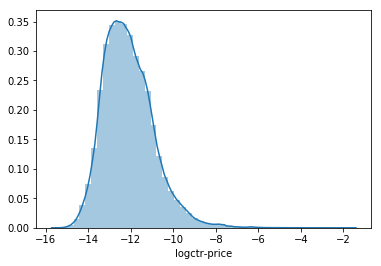

In [84]:
sns.distplot(ttr['logctr-price'])
plt.show()

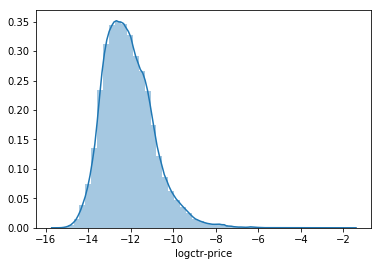

In [85]:
sns.distplot(ttr0['logctr-price'])
plt.show()

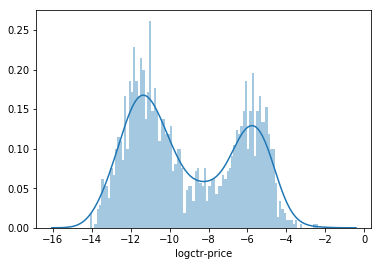

In [86]:
sns.distplot(ttr1['logctr-price'],bins = 100)
plt.show()

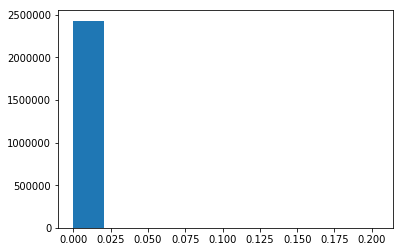

In [87]:
plt.hist(ttr['ctr-price'])
plt.show()

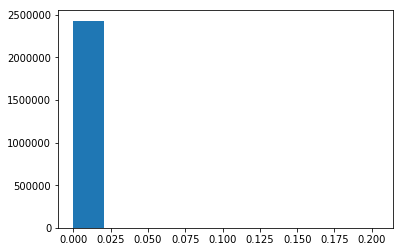

In [88]:
plt.hist(ttr0['ctr-price'])
plt.show()

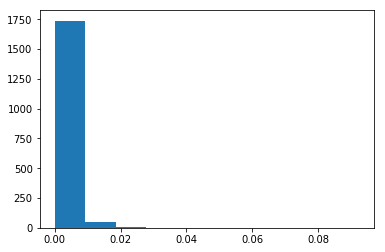

In [89]:
plt.hist(ttr1['ctr-price'])
plt.show()

## Test

In [90]:
Test_df = pd.read_csv('./data/mytestset.csv')
Group=  pd.read_csv('./we_data/Group_xx.csv')

In [91]:
Test_df = Test_df[['slotwidth', 'slotheight', 'slotprice', 'android', 'ios',
       'linux', 'mac', 'other', 'windows', 'chrome', 'firefox', 'ie',
       'maxthon', 'opera', 'other.1', 'safari', 'sogou', 'theworld',
       '10006', '10024', '10031', '10048', '10052', '10057', '10059',
       '10063', '10067', '10074', '10075', '10076', '10077', '10079',
       '10083', '10093', '10102', '10110', '10111', '10114', '10115',
       '10116', '10117', '10118', '10120', '10123', '10125', '10126',
       '10127', '10129', '10130', '10131', '10133', '10138', '10140',
       '10142', '10145', '10146', '10147', '10148', '10149', '10684',
       '11092', '11278', '11379', '11423', '11512', '11576', '11632',
       '11680', '11724', '11944', '13042', '13403', '13496', '13678',
       '13776', '13800', '13866', '13874', '14273', '15398', '16593',
       '16617', '16661', '16706', '16751', '16753', 'hour_sin', 'hour_cos',
       'city_per', 'region_per', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'adexchange_1.0', 'adexchange_2.0', 'adexchange_3.0',
       'adexchange_4.0', 'adexchange_nan', 'slotvisibility_0',
       'slotvisibility_1', 'slotvisibility_2', 'slotvisibility_255',
       'slotvisibility_FifthView', 'slotvisibility_FirstView',
       'slotvisibility_FourthView', 'slotvisibility_Na',
       'slotvisibility_OtherView', 'slotvisibility_SecondView',
       'slotvisibility_ThirdView', 'slotformat_0', 'slotformat_1',
       'slotformat_5', 'slotformat_Na', 'advertiser_1458',
       'advertiser_2259', 'advertiser_2261', 'advertiser_2821',
       'advertiser_2997', 'advertiser_3358', 'advertiser_3386',
       'advertiser_3427', 'advertiser_3476']]

In [92]:
test_x = Test_df
test_predictions = model.predict_proba(test_x)
test_predictions_class = model.predict(test_x)

In [93]:
test_result = pd.DataFrame(columns=['bidprice', 'click_pred_per', 'click_pred_class'])  
test_result['click_pred_per'] = test_predictions[:,1]
test_result['click_pred_class'] = test_predictions_class
test_result.head()

bidprice  click_pred_per  click_pred_class
0      NaN        0.005982                 0
1      NaN        0.015234                 0
2      NaN        0.001334                 0
3      NaN        0.006367                 0
4      NaN        0.004873                 0

In [94]:
test_result['click_pred_per']=recalibrate(test_result['click_pred_per'],Samp_per)
test_result.head()

bidprice  click_pred_per  click_pred_class
0      NaN        0.000601                 0
1      NaN        0.001545                 0
2      NaN        0.000134                 0
3      NaN        0.000640                 0
4      NaN        0.000489                 0

In [95]:
test_result['logpctr'] = np.log(test_result['click_pred_per'])
test_result.head()

bidprice  click_pred_per  click_pred_class   logpctr
0      NaN        0.000601                 0 -7.416104
1      NaN        0.001545                 0 -6.472984
2      NaN        0.000134                 0 -8.921073
3      NaN        0.000640                 0 -7.353448
4      NaN        0.000489                 0 -7.622139

In [96]:
base_bid=131
#这个变成你测出来最高clk的basebid！！！！！！！
avgCTR = 1793/2430981#train set
test_result['bidprice'] = base_bid*test_result['click_pred_per']/avgCTR
test_result.head()

bidprice  click_pred_per  click_pred_class   logpctr
0  106.831530        0.000601                 0 -7.416104
1  274.341351        0.001545                 0 -6.472984
2   23.719198        0.000134                 0 -8.921073
3  113.739314        0.000640                 0 -7.353448
4   86.940014        0.000489                 0 -7.622139

In [97]:
test_result[test_result['bidprice'] == 0]

Empty DataFrame
Columns: [bidprice, click_pred_per, click_pred_class, logpctr]
Index: []

In [98]:
fm_best = pd.read_csv('./Group_6_FM_154base_178.csv')
fm_best.head()

bidid    bidprice
0  366c563de7d90feb9d4dab53e795a93fb3157387   47.663223
1  29167d4caa719788b5a342dbaa25151d53121f80  820.472412
2  ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e    1.260203
3  844c2da00d45315f20b748ec131c26ee99a7cbc7   16.278303
4  c6017f0ad0c44d7d0c9b62583ea863f28941c0ca  378.963562

In [99]:
test_result['combine_bidprice'] = (fm_best['bidprice']+test_result['bidprice'])/2

In [100]:
test_result.head()

bidprice  click_pred_per  click_pred_class   logpctr  combine_bidprice
0  106.831530        0.000601                 0 -7.416104         77.247377
1  274.341351        0.001545                 0 -6.472984        547.406881
2   23.719198        0.000134                 0 -8.921073         12.489700
3  113.739314        0.000640                 0 -7.353448         65.008809
4   86.940014        0.000489                 0 -7.622139        232.951788

In [101]:
test_result_copy = test_result.copy()

In [102]:
#logpctr<-9
thresh = -9
test_result['combine_bidprice'][test_result['logpctr'] < thresh] = 0

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
test_result[test_result['combine_bidprice'] == 0].shape

(36365, 5)

In [104]:
test_result.head()

bidprice  click_pred_per  click_pred_class   logpctr  combine_bidprice
0  106.831530        0.000601                 0 -7.416104         77.247377
1  274.341351        0.001545                 0 -6.472984        547.406881
2   23.719198        0.000134                 0 -8.921073         12.489700
3  113.739314        0.000640                 0 -7.353448         65.008809
4   86.940014        0.000489                 0 -7.622139        232.951788

In [103]:
test_result.shape

(303375, 4)

In [104]:
100602/303375

0.33160939431396785

In [105]:
Group['bidprice']=test_result['combine_bidprice']
Group.head()

bidid    bidprice
0  366c563de7d90feb9d4dab53e795a93fb3157387   77.247377
1  29167d4caa719788b5a342dbaa25151d53121f80  547.406881
2  ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e   12.489700
3  844c2da00d45315f20b748ec131c26ee99a7cbc7   65.008809
4  c6017f0ad0c44d7d0c9b62583ea863f28941c0ca  232.951788

In [106]:
Group.to_csv('goodluck_logctr9_fmxg.csv', encoding='utf-8', index=False)

In [ ]:
#end

In [119]:
goodluck = pd.read_csv('goodluck_logctr9.csv')

In [120]:
goodluck.head()

bidid    bidprice
0  366c563de7d90feb9d4dab53e795a93fb3157387  106.831530
1  29167d4caa719788b5a342dbaa25151d53121f80  274.341351
2  ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e   23.719198
3  844c2da00d45315f20b748ec131c26ee99a7cbc7  113.739314
4  c6017f0ad0c44d7d0c9b62583ea863f28941c0ca   86.940014

In [124]:
goodluck[goodluck['bidprice'] == 0].shape

(36365, 2)

In [125]:
Group[Group['bidprice'] == 0].shape

(36365, 2)

In [130]:
goodluck85 = Group.copy()

In [131]:
goodluck85.head()

bidid    bidprice
0  366c563de7d90feb9d4dab53e795a93fb3157387  106.831530
1  29167d4caa719788b5a342dbaa25151d53121f80  274.341351
2  ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e   23.719198
3  844c2da00d45315f20b748ec131c26ee99a7cbc7  113.739314
4  c6017f0ad0c44d7d0c9b62583ea863f28941c0ca   86.940014

In [140]:
goodluck85['bidprice']=test_result['bidprice']
goodluck85.head()

bidid    bidprice
0  366c563de7d90feb9d4dab53e795a93fb3157387  106.831530
1  29167d4caa719788b5a342dbaa25151d53121f80  274.341351
2  ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e    0.000000
3  844c2da00d45315f20b748ec131c26ee99a7cbc7  113.739314
4  c6017f0ad0c44d7d0c9b62583ea863f28941c0ca   86.940014

In [141]:
goodluck85.to_csv('goodluck_logctr85.csv', encoding='utf-8', index=False)

In [149]:
goodluck85_11 = goodluck85.copy()

In [150]:
goodluck85_11.head()

bidid    bidprice
0  366c563de7d90feb9d4dab53e795a93fb3157387  106.831530
1  29167d4caa719788b5a342dbaa25151d53121f80  274.341351
2  ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e    0.000000
3  844c2da00d45315f20b748ec131c26ee99a7cbc7  113.739314
4  c6017f0ad0c44d7d0c9b62583ea863f28941c0ca   86.940014

In [151]:
goodluck85_11['bidprice'] = goodluck85_11['bidprice']*1.1

In [152]:
goodluck85_11.head()

bidid    bidprice
0  366c563de7d90feb9d4dab53e795a93fb3157387  117.514683
1  29167d4caa719788b5a342dbaa25151d53121f80  301.775486
2  ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e    0.000000
3  844c2da00d45315f20b748ec131c26ee99a7cbc7  125.113246
4  c6017f0ad0c44d7d0c9b62583ea863f28941c0ca   95.634016

In [153]:
goodluck85_11.to_csv('goodluck_logctr85_11.csv', encoding='utf-8', index=False)

In [144]:
goodluck85_12 = goodluck85.copy()

In [145]:
goodluck85_12.head()

bidid    bidprice
0  366c563de7d90feb9d4dab53e795a93fb3157387  106.831530
1  29167d4caa719788b5a342dbaa25151d53121f80  274.341351
2  ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e    0.000000
3  844c2da00d45315f20b748ec131c26ee99a7cbc7  113.739314
4  c6017f0ad0c44d7d0c9b62583ea863f28941c0ca   86.940014

In [146]:
goodluck85_12['bidprice'] = goodluck85_12['bidprice']*1.2

In [147]:
goodluck85_12.head()

bidid    bidprice
0  366c563de7d90feb9d4dab53e795a93fb3157387  128.197836
1  29167d4caa719788b5a342dbaa25151d53121f80  329.209621
2  ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e    0.000000
3  844c2da00d45315f20b748ec131c26ee99a7cbc7  136.487177
4  c6017f0ad0c44d7d0c9b62583ea863f28941c0ca  104.328017

In [148]:
goodluck85_12.to_csv('goodluck_logctr85_12.csv', encoding='utf-8', index=False)

 随便看一下

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


y_test = valid_result['click']
y_pred_class = valid_result['click_pred_class']

print(confusion_matrix(y_test, y_pred_class))

confusion = confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP:", TP)
print ("TN:", TN)
print ("FP:", FP)
print ("FN:", FN)

#准确率、识别率（Classification Accuracy）：分类器正确分类的比例
#print ((TP+TN) / float(TP+TN+FN+FP))
print ("Accuracy: %.6f%%" % (accuracy_score(y_test, y_pred_class)* 100.0) )

#灵敏性（Sensitivity），也称为真正例识别率、召回率（Recall）：正确识别的正例数据在实际正例数据中的百分比
#print (TP / float(TP+FN))
#recall = metrics.recall_score(y_test, y_pred_class)
print ("Recall: %.6f%%" % (recall_score(y_test, y_pred_class)* 100.0))

#特效性（Specificity），也称为真负例率：正确识别的负例数据在实际负例数据中的百分比
print ("Specificity: %.6f%%" % (TN / float(TN+FP)* 100.0))

#假阳率（False Positive Rate）：实际值是负例数据，预测错误的百分比
#print (FP / float(TN+FP))
specificity = TN / float(TN+FP)
print ("False Positive Rate: %.6f%%" %((1 - specificity)*100.0))

#精度（Precision）：看做精确性的度量，即标记为正类的数据实际为正例的百分比
#print (TP / float(TP+FP))
precision = precision_score(y_test, y_pred_class)
print ("Precision: %.6f%%" %(precision*100.0))

#F1（平衡F分数）：精确率和召回率的调和平均数
#print (TP / float(TP+FP))
f1 = f1_score(y_test, y_pred_class)
print ("F1 score: %.6f%%" %(f1*100.0))



[[303363    360]
 [   129     73]]
TP: 73
TN: 303363
FP: 360
FN: 129
Accuracy: 99.839105%
Recall: 36.138614%
Specificity: 99.881471%
False Positive Rate: 0.118529%
Precision: 16.859122%
F1 score: 22.992126%


## Find Base Bid ----QR's Code

In [108]:
df_valid = pd.read_csv("./we_data/validation.csv")

In [110]:
valid_result.head()

click  click_pred_per  click_pred_class   logpctr
0      0        0.000154                 0 -8.779909
1      0        0.000162                 0 -8.725598
2      0        0.000131                 0 -8.941928
3      0        0.000119                 0 -9.034147
4      0        0.000108                 0 -9.132151

In [118]:
valid_result_copy = valid_result.copy()

In [119]:
thresh

-8.5

In [120]:
valid_result['click_pred_per'][valid_result['logpctr'] < thresh] = 0

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
valid_result.head()

click  click_pred_per  click_pred_class   logpctr
0      0             0.0                 0 -8.779909
1      0             0.0                 0 -8.725598
2      0             0.0                 0 -8.941928
3      0             0.0                 0 -9.034147
4      0             0.0                 0 -9.132151

In [122]:
# parameters
total_budget = 6250000
payprice = df_valid['payprice'].as_matrix()
Train_df_qr = df_valid.copy()
test_predictions=valid_result['click_pred_per']
#test_predictions1=test_result['click_pred_per']

avgCTR = 1793/2430981 #train set
#tuning...

In [123]:
def generate_bidprice(base_bid, test_predictions):
    avgCTR = 1793/2430981#train set
    bidprices = base_bid*test_predictions/avgCTR
    return bidprices

In [124]:
def Prob3(Train_df,payprice,base_bid,test_predictions):
    Train_Const_summ = pd.DataFrame({'Clicks':'', 'Spend':'', 'CTR':'', 'CPM':'', 'eCPC':''}, index=[0])
    
    #if count_break = 5 break
    count_break = 0
    
    current_budget = total_budget
    Train_df['win'] = 0 #initialize win label
    bidprices = generate_bidprice(base_bid, test_predictions)
    #start biding...
    for i in Train_df.index:
    #for i in range(Train_df.shape[0]):
#         if current_budget >= bidprices[i]:
#         if current_budget > 0:
            #generate bidprice:
        current_bidprice = bidprices[i]
        #consider budget
        if current_budget <= current_bidprice:              
            #count lack budget times
            count_break = count_break + 1
            print('lack of budget!',"current_budget:",current_budget,";current_bidprice:",current_bidprice,';count_break:',count_break)
            if count_break > 5:
                break  
            #reset bidprice
            current_bidprice = current_budget
        else:
            count_break = 0
            

        #Winning criterion:
        current_payprice = payprice[i]
        if current_bidprice > current_payprice:
            Train_df.at[i, 'win'] = int(1)
            current_budget = current_budget - current_payprice
        else:
            Train_df.at[i, 'win'] = int(0)

    #biding end        
    
    Train_df_new = Train_df[Train_df['win']!=0]
    #wintimes,_ = Train_df_new.shape
    #print('wintimes:',wintimes)
    #print('current_budget',current_budget)

    Clk = Train_df_new['click'].sum()
    Imp = Train_df_new['click'].count()
    CTR = Clk/Imp
    Spd = total_budget - current_budget
    CPM = 1000*Spd/Imp
    eCPC = Spd/Clk
    
    Train_Const_summ.loc[0,'Clicks']=Clk
    Train_Const_summ.loc[0,'Spend']=Spd
    Train_Const_summ.loc[0,'CTR']=CTR
    Train_Const_summ.loc[0,'CPM']=CPM
    Train_Const_summ.loc[0,'eCPC']=eCPC

    print(Train_Const_summ)
    
        
    return Train_df,current_budget

In [125]:
def calculate_click(base_bid,Train_df,payprice,test_predictions):
    print('base_bid:',base_bid)
    result_df,current_budget = Prob3(Train_df,payprice,base_bid,test_predictions)
    print('current_budget:',current_budget)
    Train_df_new = result_df[result_df['win']!=0]
    wintimes,_ = Train_df_new.shape
    print('wintimes:',wintimes)
    print('----------------')
    Clk = Train_df_new['click'].sum()    
    return Clk

In [115]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import mpld3
import numpy as np

In [117]:
base_bids = np.arange(120,136,1)#区间可以适当左右调整一下，但大概就是这个范围
Clks = [calculate_click(base_bid,Train_df_qr,payprice,test_predictions) for base_bid in base_bids]
fig = plt.figure()
print(max(Clks))
plt.plot(base_bids,Clks)
mpld3.display(fig)

base_bid: 120
       CPM         CTR Clicks    Spend     eCPC
0  44303.9  0.00130198    166  5648661  34028.1
current_budget: 601339
wintimes: 127498
----------------
base_bid: 121
       CPM         CTR Clicks    Spend     eCPC
0  44433.3  0.00129402    166  5699994  34337.3
current_budget: 550006
wintimes: 128282
----------------
base_bid: 122
       CPM         CTR Clicks    Spend     eCPC
0  44558.1  0.00129365    167  5752100  34443.7
current_budget: 497900
wintimes: 129092
----------------
base_bid: 123
       CPM         CTR Clicks    Spend     eCPC
0  44681.7  0.00129388    168  5801567  34533.1
current_budget: 448433
wintimes: 129842
----------------
base_bid: 124
       CPM         CTR Clicks    Spend     eCPC
0  44795.8  0.00128651    168  5849709  34819.7
current_budget: 400291
wintimes: 130586
----------------
base_bid: 125
       CPM         CTR Clicks    Spend     eCPC
0  44916.6  0.00127896    168  5900113  35119.7
current_budget: 349887
wintimes: 131357
---------------

In [126]:
base_bids = np.arange(110,150,1)#区间可以适当左右调整一下，但大概就是这个范围
Clks = [calculate_click(base_bid,Train_df_qr,payprice,test_predictions) for base_bid in base_bids]
fig = plt.figure()
print(max(Clks))
plt.plot(base_bids,Clks)
mpld3.display(fig)

base_bid: 110
       CPM         CTR Clicks    Spend     eCPC
0  47655.2  0.00155583    160  4900809  30630.1
current_budget: 1349191
wintimes: 102839
----------------
base_bid: 111
     CPM         CTR Clicks    Spend     eCPC
0  47816  0.00154565    160  4949717  30935.7
current_budget: 1300283
wintimes: 103516
----------------
base_bid: 112
       CPM         CTR Clicks    Spend   eCPC
0  47977.8  0.00157423    164  4998234  30477
current_budget: 1251766
wintimes: 104178
----------------
base_bid: 113
       CPM         CTR Clicks    Spend   eCPC
0  48157.9  0.00156433    164  5048734  30785
current_budget: 1201266
wintimes: 104837
----------------
base_bid: 114
       CPM         CTR Clicks    Spend     eCPC
0  48314.5  0.00155489    164  5095923  31072.7
current_budget: 1154077
wintimes: 105474
----------------
base_bid: 115
       CPM         CTR Clicks    Spend     eCPC
0  48479.3  0.00154543    164  5144572  31369.3
current_budget: 1105428
wintimes: 106119
----------------
base

lack of budget! current_budget: 1 ;current_bidprice: 42.0924351899 ;count_break: 1
lack of budget! current_budget: 1 ;current_bidprice: 55.5890125956 ;count_break: 1
lack of budget! current_budget: 1 ;current_bidprice: 79.6560996754 ;count_break: 2
lack of budget! current_budget: 1 ;current_bidprice: 54.6063857676 ;count_break: 1
lack of budget! current_budget: 1 ;current_bidprice: 145.475077227 ;count_break: 2
lack of budget! current_budget: 1 ;current_bidprice: 70.6260656568 ;count_break: 1
lack of budget! current_budget: 1 ;current_bidprice: 62.1668866216 ;count_break: 2
lack of budget! current_budget: 1 ;current_bidprice: 322.05329888 ;count_break: 3
lack of budget! current_budget: 1 ;current_bidprice: 40.4361284442 ;count_break: 4
lack of budget! current_budget: 1 ;current_bidprice: 59.2576547327 ;count_break: 5
lack of budget! current_budget: 1 ;current_bidprice: 41.5173700042 ;count_break: 1
lack of budget! current_budget: 1 ;current_bidprice: 135.364591766 ;count_break: 2
lack 

lack of budget! current_budget: 1 ;current_bidprice: 111.362509179 ;count_break: 1
lack of budget! current_budget: 1 ;current_bidprice: 90.941108961 ;count_break: 2
lack of budget! current_budget: 1 ;current_bidprice: 77.3281188214 ;count_break: 3
lack of budget! current_budget: 1 ;current_bidprice: 43.5524478997 ;count_break: 4
lack of budget! current_budget: 1 ;current_bidprice: 52.7656167151 ;count_break: 1
lack of budget! current_budget: 1 ;current_bidprice: 47.6900062164 ;count_break: 2
lack of budget! current_budget: 1 ;current_bidprice: 40.4443144999 ;count_break: 3
lack of budget! current_budget: 1 ;current_bidprice: 64.3390758947 ;count_break: 4
lack of budget! current_budget: 1 ;current_bidprice: 68.5904138881 ;count_break: 1
lack of budget! current_budget: 1 ;current_bidprice: 66.2579457423 ;count_break: 2
lack of budget! current_budget: 1 ;current_bidprice: 52.5021892037 ;count_break: 3
lack of budget! current_budget: 1 ;current_bidprice: 50.3186394033 ;count_break: 1
lack 

lack of budget! current_budget: 4 ;current_bidprice: 42.6426695843 ;count_break: 4
lack of budget! current_budget: 4 ;current_bidprice: 99.9343266588 ;count_break: 5
lack of budget! current_budget: 4 ;current_bidprice: 1940.07230373 ;count_break: 1
lack of budget! current_budget: 4 ;current_bidprice: 79.416968635 ;count_break: 2
lack of budget! current_budget: 4 ;current_bidprice: 51.0229634957 ;count_break: 3
lack of budget! current_budget: 4 ;current_bidprice: 77.0421808399 ;count_break: 4
lack of budget! current_budget: 4 ;current_bidprice: 256.109328324 ;count_break: 5
lack of budget! current_budget: 4 ;current_bidprice: 54.0685236184 ;count_break: 6
       CPM         CTR Clicks    Spend   eCPC
0  53418.8  0.00125641    147  6249996  42517
current_budget: 4
wintimes: 117000
----------------
166


## Test + Submission

In [16]:
Test_df = pd.read_csv('./data/mytestset.csv')
Group=  pd.read_csv('./we_data/Group_xx.csv')

In [17]:
Test_df = Test_df[['slotwidth', 'slotheight', 'slotprice', 'android', 'ios',
       'linux', 'mac', 'other', 'windows', 'chrome', 'firefox', 'ie',
       'maxthon', 'opera', 'other.1', 'safari', 'sogou', 'theworld',
       '10006', '10024', '10031', '10048', '10052', '10057', '10059',
       '10063', '10067', '10074', '10075', '10076', '10077', '10079',
       '10083', '10093', '10102', '10110', '10111', '10114', '10115',
       '10116', '10117', '10118', '10120', '10123', '10125', '10126',
       '10127', '10129', '10130', '10131', '10133', '10138', '10140',
       '10142', '10145', '10146', '10147', '10148', '10149', '10684',
       '11092', '11278', '11379', '11423', '11512', '11576', '11632',
       '11680', '11724', '11944', '13042', '13403', '13496', '13678',
       '13776', '13800', '13866', '13874', '14273', '15398', '16593',
       '16617', '16661', '16706', '16751', '16753', 'hour_sin', 'hour_cos',
       'city_per', 'region_per', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'adexchange_1.0', 'adexchange_2.0', 'adexchange_3.0',
       'adexchange_4.0', 'adexchange_nan', 'slotvisibility_0',
       'slotvisibility_1', 'slotvisibility_2', 'slotvisibility_255',
       'slotvisibility_FifthView', 'slotvisibility_FirstView',
       'slotvisibility_FourthView', 'slotvisibility_Na',
       'slotvisibility_OtherView', 'slotvisibility_SecondView',
       'slotvisibility_ThirdView', 'slotformat_0', 'slotformat_1',
       'slotformat_5', 'slotformat_Na', 'advertiser_1458',
       'advertiser_2259', 'advertiser_2261', 'advertiser_2821',
       'advertiser_2997', 'advertiser_3358', 'advertiser_3386',
       'advertiser_3427', 'advertiser_3476']]

In [18]:
test_x = Test_df
test_predictions = model.predict_proba(test_x)
test_predictions_class = model.predict(test_x)

TypeError: 'str' object is not callable

In [ ]:
test_result = pd.DataFrame(columns=['bidprice', 'click_pred_per', 'click_pred_class'])  
test_result['click_pred_per'] = test_predictions[:,1]
test_result['click_pred_class'] = test_predictions_class
test_result.head()

In [ ]:
test_result['click_pred_per']=recalibrate(test_result['click_pred_per'],Samp_per)
test_result.head()

In [ ]:
base_bid=131
#这个变成你测出来最高clk的basebid！！！！！！！
avgCTR = 1793/2430981#train set
test_result['bidprice'] = base_bid*test_result['click_pred_per']/avgCTR
test_result.head()

In [ ]:
Group['bidprice']=test_result['bidprice']
Group.head()

In [ ]:
Group.to_csv('/Users/weisihan/Desktop/Group_6.csv', encoding='utf-8', index=False)